<a href="https://colab.research.google.com/github/buzzaggwd/NLP/blob/main/npl_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [43]:
PATH_TO_FILE: str = '/content/education-career-success_1.csv'
df = pd.read_csv(PATH_TO_FILE)

In [44]:
df

,Age,Job_Offers
0,24,5
1,21,4
2,28,0
3,25,1
4,22,4
...,...,...
4995,26,5
4996,18,5
4997,19,2
4998,19,5


In [45]:
def linear_regression(df: pd.DataFrame) -> list[float]:
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  X_b = np.c_[np.ones((len(X), 1)), X]
  theta = np.linalg.lstsq(X_b, y, rcond=None)[0]
  return theta.flatten().tolist()

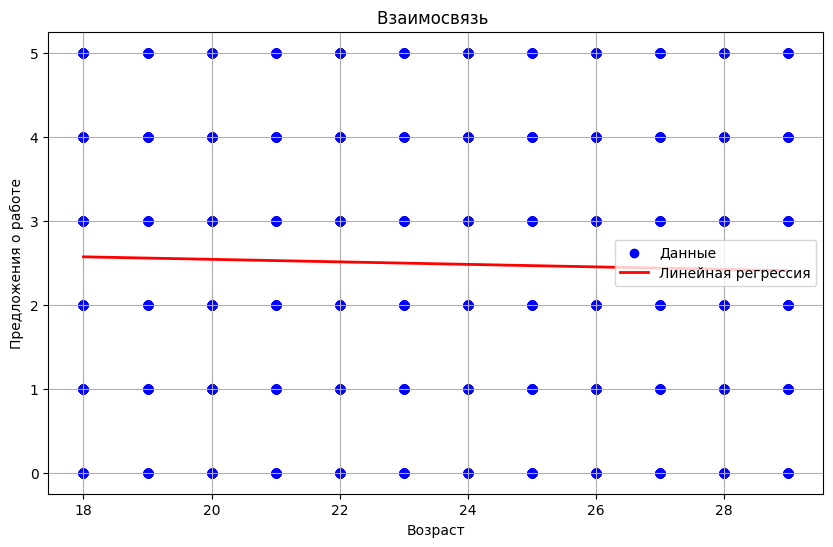

In [46]:
coefficients = linear_regression(df)
intercept, slope = coefficients

X_plot = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
y_pred = intercept + slope * X_plot

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Job_Offers'], color='blue', label='Данные')
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Возраст')
plt.ylabel('Предложения о работе')
plt.title('Взаимосвязь ')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
def activation_func(x: list[float]) -> list[float]:
  return [1 / (1 + math.exp(-xi)) for xi in x]

![neuron](https://nickmccullum.com/images/python-deep-learning/understanding-neurons-deep-learning/activation-function.png)

In [48]:
def neuron(df: pd.DataFrame):
  coefficients = linear_regression(df)
  intercept = coefficients[0]
  feature_coeffs = coefficients[1:]
  linear_combination = []
  for index, row in df.iloc[:, :-1].iterrows():
      value = intercept
      for i, feature in enumerate(row):
          value += feature * feature_coeffs[i]
      linear_combination.append(value)
  result = activation_func(linear_combination)
  return result

print(neuron(df))

[0.9227600382735301, 0.9258998611418092, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9227600382735301, 0.9194987398814248, 0.9269201100816803, 0.9227600382735301, 0.9183840059033842, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9258998611418092, 0.9216866185255069, 0.9216866185255069, 0.9269201100816803, 0.9238199610325403, 0.9248665233083789, 0.9279274051590447, 0.9216866185255069, 0.917255224832923, 0.9238199610325403, 0.9279274051590447, 0.917255224832923, 0.9248665233083789, 0.9289218808622066, 0.917255224832923, 0.9194987398814248, 0.9238199610325403, 0.917255224832923, 0.9205995648453472, 0.9289218808622066, 0.9183840059033842, 0.9183840059033842, 0.9194987398814248, 0.917255224832923, 0.917255224832923, 0.9269201100816803, 0.917255224832923, 0.9227600382735301, 0.9258998611418092, 0.9205995648453472, 0.9269201100816803, 0.9248665233083789, 0.9269201100816803, 0.9227600382735301, 0.9248665233083789, 0.9205995648453472, 0.9227600382735301, 0.9279

In [49]:
class Neuralnetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        np.random.seed(42)
        self.lr = learning_rate

        self.neuron_coeffs = linear_regression(df[['Age', 'Job_Offers']])
        self.neuron_intercept = self.neuron_coeffs[0]
        self.neuron_weight = self.neuron_coeffs[1]

        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        neuron_output = np.array(activation_func([self.neuron_intercept + self.neuron_weight * x[0] for x in X]))
        neuron_output = neuron_output.reshape(-1, 1)

        z1 = np.dot(neuron_output, self.W1) + self.b1
        a1 = np.array([activation_func(row) for row in z1])
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = np.array([activation_func(row) for row in z2])
        return a2

    def backward(self, X, y):
        pass

    def train(self, X, y, epochs):
        pass

input_size = 1
hidden_size = 5
output_size = 1
learning_rate = 0.01
epochs = 1000

nn = Neuralnetwork(input_size, hidden_size, output_size, learning_rate)
predictions = nn.forward(X_normalized)

print("Исходный нейрон:", neuron(df)[:5])
print("Результаты прогнозирования:", predictions.flatten()[:5])

Исходный нейрон: [0.9227600382735301, 0.9258998611418092, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789]
Результаты прогнозирования: [0.52689348 0.52689339 0.5268936  0.52689351 0.52689342]


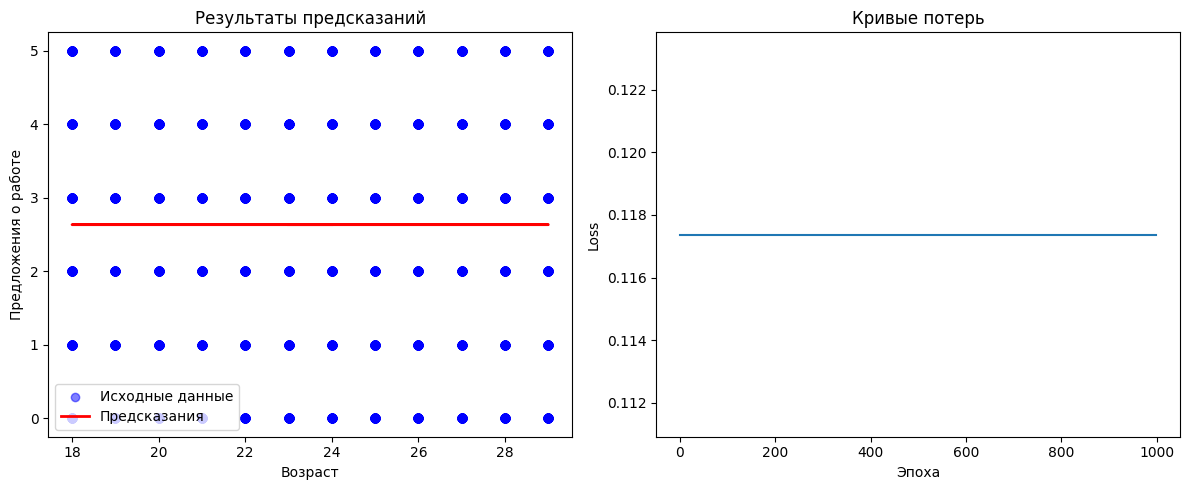


Ключевые показатели:
Первые 5 предсказаний: [2.6344673962598124, 2.6344669450567935, 2.634468000416757, 2.6344675470251384, 2.6344670952758307]
Средняя абсолютная ошибка: 1.50
Коэффициент детерминации (R²): -0.01


In [50]:
X = df[['Age']].values
y = df[['Job_Offers']].values

X_normalized = (X - X.min()) / (X.max() - X.min())
y_normalized = (y - y.min()) / (y.max() - y.min())

y_pred = predictions * (y.max() - y.min()) + y.min()
y_normalized = y_normalized * (y.max() - y.min()) + y.min()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Исходные данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Предсказания')
plt.xlabel('Возраст')
plt.ylabel('Предложения о работе')
plt.title('Результаты предсказаний')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Кривые потерь')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

print("\nКлючевые показатели:")
print(f"Первые 5 предсказаний: {y_pred[:5].flatten().tolist()}")
print(f"Средняя абсолютная ошибка: {np.mean(np.abs(y_pred - y)):.2f}")
print(f"Коэффициент детерминации (R²): {1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2):.2f}")